In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mp
import matplotlib.pyplot as plt
from simpledbf import Dbf5

In [2]:
# import datasets from all horizons
d01 = "C:\\Users\\Research\\Documents\\Tara_Fall_2019\\Field_Data\\Field_sites_for_NDVI.dbf"
# convert to pandas dataframes
dbf = Dbf5(d01)
df = dbf.to_dataframe()

In [3]:
df['F_Silt'] = pd.to_numeric(df.F47)
df['F_Sand'] = pd.to_numeric(df.F49)
df['F_Clay'] = pd.to_numeric(df.F51)
df['F_Organic_'] = pd.to_numeric(df.F43)

In [104]:
NDVI = df[['1_11_2016', '1_24_2016', '2_9_2016', '2_25_2016', '3_12_2016',
       '3_28_2016', '4_13_2016', '4_29_2016', '5_15_2016', '5_31_2016',
       '6_16_2016', '7_2_2016', '7_18_2016', '8_3_2016', '8_19_2016',
       '9_4_2016', '9_20_2016', '10_6_2016', '10_22_2016', '11_7_2016',
       '11_23_2016', '12_9_2016', '12_25_2016', '1_10_2017']]


In [113]:
def awc(row):
    sand = row["F_Sand"] /100
    silt = row["F_Silt"]/100
    clay = row["F_Clay"]/100
    om = 2.17 * row["F_Organic_"] /100
    gravel = row["coarse_fra"] / 100

    WP1 = -0.024 * (sand) + 0.487 * (clay) + 0.006 * (om) + 0.005 * (sand) * (om) - 0.013 * (clay) * (om) + 0.068 * (
        sand) * (clay) + 0.031
    WP = WP1 + (0.14 * WP1 - 0.02)
    FC1 = -0.251 * (sand) + 0.195 * (clay) + 0.011 * (om) + 0.006 * (sand) * (om) - 0.027 * (clay) * (om) + 0.452 * (
        sand) * (clay) + 0.299
    FC = FC1 + (1.283 * FC1 * FC1 - 0.374 * FC1 - 0.015)
    LAWC = (FC - WP) * (1 - (gravel)) * 100

    return LAWC

In [114]:
df['awc_site'] = df.apply(awc, axis = 1)

In [115]:
df['awc_site']

0      6.064124
1     11.746229
2      3.197178
3      3.645765
4      7.692151
5      3.061808
6      6.226444
7      6.524044
8      4.277198
9      8.439184
10     3.450669
11     2.967635
12    11.444480
13     3.932253
14     3.475942
15     4.662553
16     6.116053
Name: awc_site, dtype: float64

In [100]:
df.columns

Index(['Join_Count', 'TARGET_FID', 'Team', 'Commune', 'Topography', 'Farmer',
       'Current_Cr', 'Next_or_Pr', 'Fertilizer', 'DAP_Amount', 'NPK_Amount',
       'UREA_Amoun', 'Other_Fert', 'Manure_Use', 'Animal_Man', 'Compost_Ap',
       'Animal_M_1', 'Animal_M_2', 'Animal_M_3', 'Compost_Co', 'Latitude',
       'Longitude', 'Altitude', 'Bar_Code', 'Lab_Code', 'pH', 'F25',
       'Phosphorus', 'Potassium', 'Calcium', 'Magnesium', 'Sulphur', 'F31',
       'Sodium', 'Iron', 'F34', 'Manganese', 'F36', 'Boron', 'Copper', 'F39',
       'Zinc', 'F41', 'F_Organic_', 'F43', 'F_Total_Ni', 'F45', 'F_Silt',
       'F47', 'F_Sand', 'F49', 'F_Clay', 'F51', 'Join_Cou_1', 'TARGET_F_1',
       'bulk_dens', 'cec', 'coarse_fra', 'clay', 'org_c', 'ph_1', 'sand',
       'silt', 'AWC_sg', 'LCC', 'LCC_no_awc', 's_sand', 's_silt', 's_clay',
       '1_11_2016', '1_24_2016', '2_9_2016', '2_25_2016', '3_12_2016',
       '3_28_2016', '4_13_2016', '4_29_2016', '5_15_2016', '5_31_2016',
       '6_16_2016', '7_2_20

<Figure size 432x288 with 0 Axes>

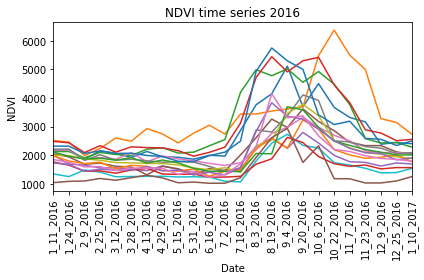

In [66]:
plt.figure(); 
NDVI.T.plot(legend = False);
plt.xticks(np.arange(24), NDVI.columns, rotation = 90)
plt.ylabel("NDVI")
plt.xlabel("Date")
plt.title("NDVI time series 2016")
plt.tight_layout()
#plt.savefig("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\Paper_figs\\NDVI_time_series_2016_fieldsites.png", )

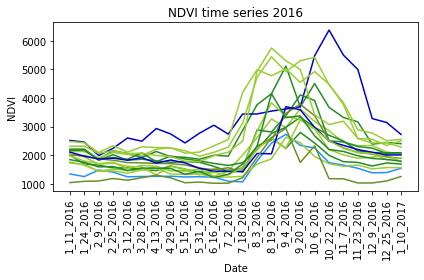

In [124]:
plt.figure()
for i in range(len(df)): 
    if df["awc_site"][i] >=10:
        plt.plot(NDVI.columns, NDVI.iloc[i], color = "mediumblue")
    if (df["awc_site"][i] >=8) & (df["awc_site"][i] <10):
        plt.plot(NDVI.columns, NDVI.iloc[i], color = "dodgerblue")
    if (df["awc_site"][i] >=6) & (df["awc_site"][i] <8):
        plt.plot(NDVI.columns, NDVI.iloc[i], color = "forestgreen")
    if (df["awc_site"][i] >=4) & (df["awc_site"][i] <6):
        plt.plot(NDVI.columns, NDVI.iloc[i], color = "olivedrab")
    if (df["awc_site"][i] >=2) & (df["awc_site"][i] <4):
        plt.plot(NDVI.columns, NDVI.iloc[i], color = "yellowgreen")
    if (df["awc_site"][i] <2):
        plt.plot(NDVI.columns, NDVI.iloc[i], color = "gold")
plt.xticks(np.arange(24), NDVI.columns, rotation = 90)
plt.ylabel("NDVI")
plt.xlabel("Date")
plt.title("NDVI time series 2016")
plt.tight_layout()
plt.savefig("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\Paper_figs\\awc_colored_NDVI_time_series_2016_fieldsites.png", )

In [54]:
sandy_sites = df[df["F_Sand"] >= 85]
loamy_sand_sites = df[(df["F_Sand"] >= 70) & (df["F_Sand"] < 85)]
loamy_sites = df[df["F_Sand"] < 70]

In [55]:
sandy_sites_NDVI = sandy_sites[['1_11_2016', '1_24_2016', '2_9_2016', '2_25_2016', '3_12_2016',
       '3_28_2016', '4_13_2016', '4_29_2016', '5_15_2016', '5_31_2016',
       '6_16_2016', '7_2_2016', '7_18_2016', '8_3_2016', '8_19_2016',
       '9_4_2016', '9_20_2016', '10_6_2016', '10_22_2016', '11_7_2016',
       '11_23_2016', '12_9_2016', '12_25_2016', '1_10_2017']]
loamy_sand_sites_NDVI = loamy_sand_sites[['1_11_2016', '1_24_2016', '2_9_2016', '2_25_2016', '3_12_2016',
       '3_28_2016', '4_13_2016', '4_29_2016', '5_15_2016', '5_31_2016',
       '6_16_2016', '7_2_2016', '7_18_2016', '8_3_2016', '8_19_2016',
       '9_4_2016', '9_20_2016', '10_6_2016', '10_22_2016', '11_7_2016',
       '11_23_2016', '12_9_2016', '12_25_2016', '1_10_2017']]
loamy_sites_NDVI = loamy_sites[['1_11_2016', '1_24_2016', '2_9_2016', '2_25_2016', '3_12_2016',
       '3_28_2016', '4_13_2016', '4_29_2016', '5_15_2016', '5_31_2016',
       '6_16_2016', '7_2_2016', '7_18_2016', '8_3_2016', '8_19_2016',
       '9_4_2016', '9_20_2016', '10_6_2016', '10_22_2016', '11_7_2016',
       '11_23_2016', '12_9_2016', '12_25_2016', '1_10_2017']]

<Figure size 432x288 with 0 Axes>

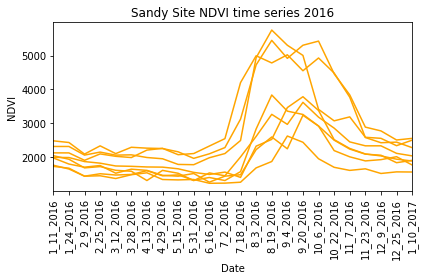

In [96]:
plt.figure(); 
sandy_sites_NDVI.T.plot(legend = False, color = "orange");
plt.xticks(np.arange(24), NDVI.columns, rotation = 90)
plt.ylabel("NDVI")
plt.xlabel("Date")
plt.title("Sandy Site NDVI time series 2016")
plt.tight_layout()
plt.savefig("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\Paper_figs\\sandy_siteNDVI_time_series_2016_fieldsites.png", )

<Figure size 432x288 with 0 Axes>

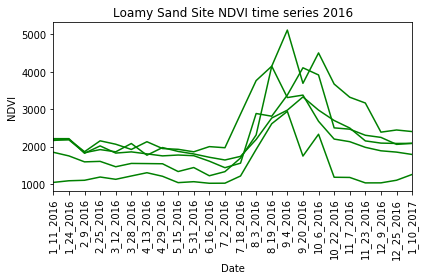

In [97]:
plt.figure(); 
loamy_sand_sites_NDVI.T.plot(legend = False, color = "green");
plt.xticks(np.arange(24), NDVI.columns, rotation = 90)
plt.ylabel("NDVI")
plt.xlabel("Date")
plt.title("Loamy Sand Site NDVI time series 2016")
plt.tight_layout()
plt.savefig("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\Paper_figs\\loamy_sandNDVI_time_series_2016_fieldsites.png", )

<Figure size 432x288 with 0 Axes>

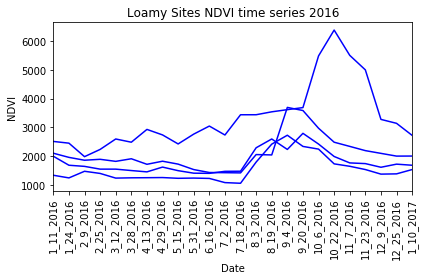

In [98]:
plt.figure(); 
loamy_sites_NDVI.T.plot(legend = False, color = "blue");
plt.xticks(np.arange(24), NDVI.columns, rotation = 90)
plt.ylabel("NDVI")
plt.xlabel("Date")
plt.title("Loamy Sites NDVI time series 2016")
plt.tight_layout()
plt.savefig("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\Paper_figs\\loamy_NDVI_time_series_2016_fieldsites.png", )

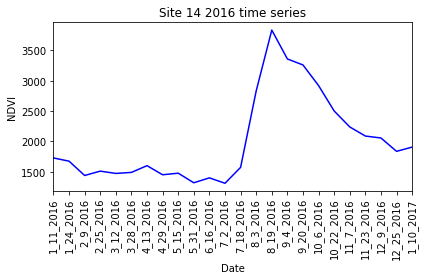

In [165]:
plt.figure(); 
i = 14
NDVI.T[i].plot(legend = False, color = "blue");
plt.xticks(np.arange(24), NDVI.columns, rotation = 90)
plt.ylabel("NDVI")
plt.xlabel("Date")
plt.title("Site " + str(i)+ " 2016 time series")
plt.tight_layout()
plt.savefig("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\Paper_figs\\field_site14_2016.png", )

In [150]:
succinct = df[['Join_Count', 'Team', 'Commune', 'Topography', 'Farmer',
       'Current_Cr', 'Next_or_Pr', 'Fertilizer', 'DAP_Amount', 'NPK_Amount',
       'UREA_Amoun', 'Other_Fert', 'Manure_Use', 'Animal_Man', 'Compost_Ap',
       'Animal_M_1', 'Animal_M_2', 'Animal_M_3', 'Compost_Co', 'Latitude',
       'Longitude', 'Altitude', 'Bar_Code', 'Lab_Code', 'pH', 'F25',
       'Phosphorus', 'Potassium', 'Calcium', 'Magnesium', 'Sulphur', 'F31',
       'Sodium', 'Iron', 'F34', 'Manganese', 'F36', 'Boron', 'Copper', 'F39',
       'Zinc', 'F41', 'F_Organic_', 'F_Total_Ni', 'F45', 'F_Silt',
        'F_Sand','F_Clay','coarse_fra', 'awc_site']]

In [164]:
succinct.iloc[14]

Join_Count                   1
Team                      T#02
Commune            Dogon Kirya
Topography    Complexe dunaire
Farmer                     NaN
Current_Cr        Millet Niébé
Next_or_Pr                 NaN
Fertilizer                 NaN
DAP_Amount                 NaN
NPK_Amount                 NaN
UREA_Amoun                 NaN
Other_Fert                 NaN
Manure_Use                 NaN
Animal_Man                 NaN
Compost_Ap                 NaN
Animal_M_1                 NaN
Animal_M_2                 NaN
Animal_M_3                 NaN
Compost_Co                 NaN
Latitude               14.0881
Longitude              4.36744
Altitude                 252.2
Bar_Code       IFDC/NE19/TS173
Lab_Code           CI112SA0993
pH                         NaN
F25                     5.2105
Phosphorus                3.99
Potassium             0.041795
Calcium                   0.63
Magnesium             0.224167
Sulphur                   1.13
F31                       6.92
Sodium  